In [49]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import folium
from folium import plugins
from folium.plugins import HeatMap
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime


C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [120]:
! pip install textblob
from textblob import TextBlob

In [63]:
btc = pd.read_csv("BTC-Hourly.csv")
doge2 = pd.read_csv('doge.csv')
tweets = pd.read_csv('musktweets.csv')

In [282]:

# Delete words starting with '@' in the 'text' column
tweets['MESSAGE'] = tweets['MESSAGE'].str.replace(r'@\w+', '', regex=True)

# Print the updated DataFrame
tweets


,MESSAGE,date,Day,sentiment_score,sentiment
0,"Please ignore prior tweets, as that was someon...",2010-06-04 18:00:00,2010-06-04,0.166667,Positive
1,Went to Iceland on Sat to ride bumper cars on ...,2011-12-01 09:00:00,2011-12-01,0.600000,Positive
2,I made the volume on the Model S http://ow.ly/...,2011-12-01 10:00:00,2011-12-01,0.000000,Neutral
3,"Great Voltaire quote, arguably better than Twa...",2011-12-03 08:00:00,2011-12-03,0.450000,Positive
4,That was a total non sequitur btw\n26\n14\n50,2011-12-03 08:00:00,2011-12-03,0.000000,Neutral
...,...,...,...,...,...
31882,"Neuralink — Elon Musk () [May 22, 2023](https...",2023-05-23 00:00:00,2023-05-23,0.000000,Neutral
31883,Human output data rate is absurdly low — Elo...,2023-05-23 00:00:00,2023-05-23,0.000000,Neutral
31884,"Good idea — Elon Musk () [May 23, 2023](https...",2023-05-23 14:00:00,2023-05-23,0.700000,Positive
31885,It’s pretty wild in the Notes world! Many int...,2023-05-23 16:00:00,2023-05-23,0.329167,Positive


In [298]:
# Assuming you have a DataFrame 'df' with a column 'text'

## Assuming you have a DataFrame 'df' with a column 'text'

# Delete rows where 'text' column starts with 'replying'
tweets = tweets[~tweets['MESSAGE'].str.startswith('Replying')].reset_index(drop=True)

# Print the updated DataFrame
print(tweets)



                                                 MESSAGE                date  \
0      Please ignore prior tweets, as that was someon... 2010-06-04 18:00:00   
1      Went to Iceland on Sat to ride bumper cars on ... 2011-12-01 09:00:00   
2      I made the volume on the Model S http://ow.ly/... 2011-12-01 10:00:00   
3      Great Voltaire quote, arguably better than Twa... 2011-12-03 08:00:00   
4          That was a total non sequitur btw\n26\n14\n50 2011-12-03 08:00:00   
...                                                  ...                 ...   
23041   Neuralink — Elon Musk () [May 22, 2023](https... 2023-05-23 00:00:00   
23042    Human output data rate is absurdly low — Elo... 2023-05-23 00:00:00   
23043   Good idea — Elon Musk () [May 23, 2023](https... 2023-05-23 14:00:00   
23044   It’s pretty wild in the Notes world! Many int... 2023-05-23 16:00:00   
23045   Write it on Twitter! Our algorithm automatica... 2023-05-23 16:00:00   

             Day  sentiment_score senti

In [316]:
tweets= tweets.drop_duplicates(subset='MESSAGE', keep = 'last')

In [356]:

# Create a set to store the first 3 words of each row
first_3_words_set = set()

# Iterate through each row in the 'MESSAGE' column
for index, row in tweets.iterrows():
    # Extract the first 3 words of the current row
    first_3_words = ' '.join(row['MESSAGE'].split()[:3])

    # Check if the first 3 words already exist in the set
    if first_3_words in first_3_words_set:
        tweets = tweets.drop(index)
    else:
        first_3_words_set.add(first_3_words)

# Reset the index of the DataFrame
tweets = tweets.reset_index(drop=True)

# Print the updated DataFrame
print(tweets)


                                                 MESSAGE                date  \
0      Please ignore prior tweets, as that was someon... 2010-06-04 18:00:00   
1      Went to Iceland on Sat to ride bumper cars on ... 2011-12-01 09:00:00   
2      I made the volume on the Model S http://ow.ly/... 2011-12-01 10:00:00   
3      Great Voltaire quote, arguably better than Twa... 2011-12-03 08:00:00   
4          That was a total non sequitur btw\n26\n14\n50 2011-12-03 08:00:00   
...                                                  ...                 ...   
16685   Layers of irony — Elon Musk () [May 22, 2023]... 2023-05-22 20:00:00   
16686   Neuralink — Elon Musk () [May 22, 2023](https... 2023-05-23 00:00:00   
16687    Human output data rate is absurdly low — Elo... 2023-05-23 00:00:00   
16688   It’s pretty wild in the Notes world! Many int... 2023-05-23 16:00:00   
16689   Write it on Twitter! Our algorithm automatica... 2023-05-23 16:00:00   

             Day  sentiment_score senti

In [65]:
tweets = tweets.drop('Unnamed: 0', axis=1)
tweets.head()


In [126]:
tweets['date'] = pd.to_datetime(tweets['date'])

In [124]:
tweets['date'] = tweets['date'].dt.floor('H')
tweets['date'] = tweets['date'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [357]:
# Convert 'MESSAGE' column to string type
tweets['MESSAGE'] = tweets['MESSAGE'].astype(str)

# Calculate sentiment score
tweets['sentiment_score'] = tweets['MESSAGE'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Assign sentiment based on sentiment score
tweets['sentiment'] = tweets['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the DataFrame
tweets.head()

,MESSAGE,date,Day,sentiment_score,sentiment
0,"Please ignore prior tweets, as that was someon...",2010-06-04 18:00:00,2010-06-04,0.166667,Positive
1,Went to Iceland on Sat to ride bumper cars on ...,2011-12-01 09:00:00,2011-12-01,0.600000,Positive
2,I made the volume on the Model S http://ow.ly/...,2011-12-01 10:00:00,2011-12-01,0.000000,Neutral
3,"Great Voltaire quote, arguably better than Twa...",2011-12-03 08:00:00,2011-12-03,0.450000,Positive
4,That was a total non sequitur btw\n26\n14\n50,2011-12-03 08:00:00,2011-12-03,0.000000,Neutral


In [358]:
tweets

,MESSAGE,date,Day,sentiment_score,sentiment
0,"Please ignore prior tweets, as that was someon...",2010-06-04 18:00:00,2010-06-04,0.166667,Positive
1,Went to Iceland on Sat to ride bumper cars on ...,2011-12-01 09:00:00,2011-12-01,0.600000,Positive
2,I made the volume on the Model S http://ow.ly/...,2011-12-01 10:00:00,2011-12-01,0.000000,Neutral
3,"Great Voltaire quote, arguably better than Twa...",2011-12-03 08:00:00,2011-12-03,0.450000,Positive
4,That was a total non sequitur btw\n26\n14\n50,2011-12-03 08:00:00,2011-12-03,0.000000,Neutral
...,...,...,...,...,...
16685,"Layers of irony — Elon Musk () [May 22, 2023]...",2023-05-22 20:00:00,2023-05-22,0.000000,Neutral
16686,"Neuralink — Elon Musk () [May 22, 2023](https...",2023-05-23 00:00:00,2023-05-23,0.000000,Neutral
16687,Human output data rate is absurdly low — Elo...,2023-05-23 00:00:00,2023-05-23,0.000000,Neutral
16688,It’s pretty wild in the Notes world! Many int...,2023-05-23 16:00:00,2023-05-23,0.329167,Positive


In [360]:
tweets.to_csv('final_tweets.csv')

In [131]:
btc['date'] = pd.to_datetime(btc['date'])

In [43]:
btc_stat = pd.DataFrame(round(btc['close'].describe(),3))

In [44]:
btc_stat = btc_stat.rename(columns = {"close":"BTC"})

In [45]:
btc_stat = btc_stat.T

In [46]:
btc_stat = btc_stat.drop(columns = ['count'])

In [47]:
btc_stat

,mean,std,min,25%,50%,75%,max
BTC,20120.685,18537.695,3139.76,7022.865,9700.32,36423.04,68627.01


In [34]:
doge2 = doge2[['time', 'PriceUSD']]

In [36]:
doge2['time'] = pd.to_datetime(doge2['time'])

In [37]:
doge2.to_csv('dogecoin_prices.csv', index=False)

In [41]:
doge_stat = pd.DataFrame(round(doge2['PriceUSD'].describe(),3))

In [42]:
doge_stat

,PriceUSD
count,3460.000
mean,0.038
std,0.079
min,0.000
25%,0.000
50%,0.002
75%,0.054
max,0.685


In [53]:
doge_stat = doge_stat.rename(columns = {"PriceUSD":"DOGE"})

In [54]:
doge_stat = doge_stat.T
doge_stat = doge_stat.drop(columns = ['count'])

In [55]:
doge_stat

,mean,std,min,25%,50%,75%,max
DOGE,0.038,0.079,0.0,0.0,0.002,0.054,0.685


In [56]:
merged_stats = pd.concat([doge_stat, btc_stat])

In [59]:
merged_stats = merged_stats.reset_index()
merged_stats.columns = map(str.upper, merged_stats.columns)

In [61]:
merged_stats = merged_stats.rename(columns = {'INDEX':'CURRENCY'})

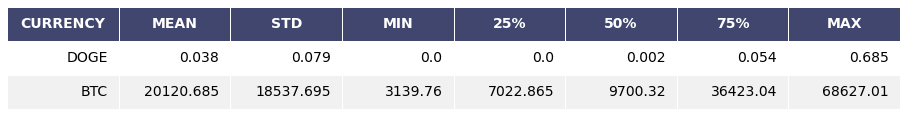

In [62]:

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(merged_stats, header_columns=0, col_width=2.0)
fig.savefig("table_stats.png")

In [361]:
all_tweets_bitcoin = pd.merge(tweets, btc, on='date', how='inner')

In [362]:
all_tweets_bitcoin

,MESSAGE,date,Day,sentiment_score,sentiment,unix,symbol,open,high,low,close,Volume BTC,Volume USD
0,Boring Company Hyperloop will take you from ci...,2018-05-16 09:00:00,2018-05-16,0.240000,Positive,1526461200,BTC/USD,8207.48,8263.93,8207.48,8243.45,1.501104e+06,1.823600e+02
1,Will be presenting & taking questions about T...,2018-05-16 10:00:00,2018-05-16,-1.000000,Negative,1526464800,BTC/USD,8243.45,8455.66,8237.10,8371.13,7.667494e+06,9.153200e+02
2,"Listening to REALiTi\n944\n4,719\n27.8K",2018-05-17 06:00:00,2018-05-17,0.000000,Neutral,1526536800,BTC/USD,8363.70,8382.41,8335.49,8344.16,1.761990e+06,2.107700e+02
3,lol https://instagram.com/p/Bi43eF1DsLt/?utm_s...,2018-05-17 18:00:00,2018-05-17,0.800000,Positive,1526580000,BTC/USD,8257.69,8274.83,8110.02,8166.00,4.838784e+06,5.910600e+02
4,Excited for \n\n partnership with LA Metro\nLA...,2018-05-18 00:00:00,2018-05-18,0.375000,Positive,1526601600,BTC/USD,8067.03,8068.92,7929.53,7958.08,4.185614e+06,5.244200e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,Successful Starlink deploy https://t.co/ChUh6...,2022-02-25 18:00:00,2022-02-25,0.750000,Positive,1645812000,BTC/USD,39025.65,39054.76,38556.27,38685.67,5.908195e+01,2.285625e+06
9368,Would be a good move. Needs to include put op...,2022-02-25 23:00:00,2022-02-25,0.700000,Positive,1645830000,BTC/USD,39434.79,39680.89,39160.76,39231.64,1.321115e+02,5.182950e+06
9369,https://t.co/4kRJyp0FOv— Elon Musk () [Feb 26...,2022-02-26 01:00:00,2022-02-26,0.000000,Neutral,1645837200,BTC/USD,39774.69,39844.04,39601.00,39759.90,3.466074e+01,1.378107e+06
9370,Starlink service is now active in Ukraine. Mo...,2022-02-26 23:00:00,2022-02-26,0.183333,Positive,1645916400,BTC/USD,39159.91,39183.18,38938.99,39146.66,3.899397e+01,1.526484e+06


In [363]:
all_tweets_bitcoin['MESSAGE'] = all_tweets_bitcoin['MESSAGE'].fillna('')


# Filter tweets containing specific words
filtered_df = all_tweets_bitcoin[all_tweets_bitcoin['MESSAGE'].str.contains('Bitcoin|BTC|bitcoin|bit coin', case=False, regex=True)]

# Create a new dataset with selected columns
dataset = filtered_df[['MESSAGE', 'date']].copy()


In [307]:
dataset= dataset.drop_duplicates(subset='MESSAGE', keep = 'last')

In [364]:
dataset

,MESSAGE,date
997,"That said, I still only own 0.25 BTC, which a ...",2019-02-21 10:00:00
999,Whoever owns the early BTC deserves a Nobel pr...,2019-02-21 10:00:00
1384,Dogecoin value may vary\ntheonion.com\nBitcoin...,2019-04-02 20:00:00
3676,"Bitcoin is *not* my safe word\n2,653\n9,227\n115K",2020-01-10 06:00:00
4575,How much for some anime Bitcoin? [pic.twitter....,2020-05-01 23:00:00
4791,I still only own 0.25 Bitcoins btw— Elon Musk ...,2020-05-15 22:00:00
5261,"Feeling greatful, doubling all payments sent t...",2020-07-15 20:00:00
6417,"Bitcoin is my safe word\n6,396\n22K\n229.3K",2020-12-20 08:00:00
6421,"Bitcoin is almost as bs as fiat money\n7,837\n...",2020-12-20 09:00:00
6748,"Doge appears to be inflationary, but is not me...",2021-02-08 05:00:00


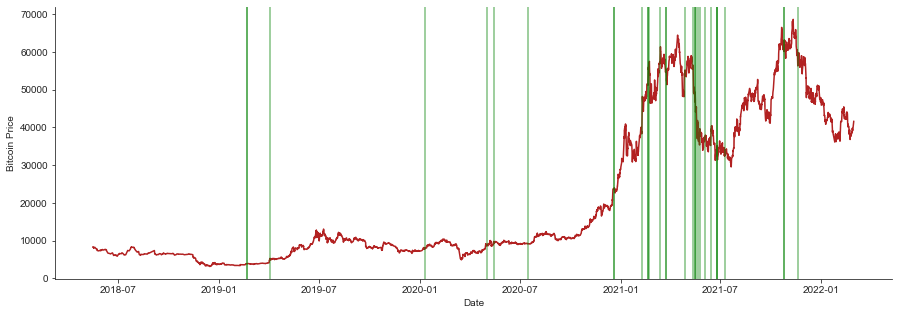

In [365]:
plt.figure(figsize=(15,5))
sns.set_style("ticks")
ax = sns.lineplot(data=all_tweets_bitcoin,x="date",y='close',color='firebrick')
ax.set(xlabel='Date', ylabel='Bitcoin Price')
for tweet_date in dataset['date']:
    ax.axvline(x=tweet_date, color='green', linestyle='-', alpha=0.5)
sns.despine()
plt.savefig("bitcoin_price_tweets.png", dpi = 600, transparent = True, bbox_inches = 'tight')


In [134]:
tweets_copy = tweets
tweets_copy['date'] = pd.to_datetime(tweets['date'])
# Create a new column representing the month
tweets_copy['Day'] = tweets_copy['date'].dt.to_period('D')
tweets_copy['Day'] = tweets_copy['Day'].dt.to_timestamp()
                     

In [ ]:
doge2 = doge2.rename(columns = {'time':'date'})

In [80]:
doge2['date'] = pd.to_datetime(doge2['date'])

In [74]:
doge2 = doge2.rename(columns = {'time':'date'})


In [137]:
doge2

,date,PriceUSD
id,,
0,2013-12-08,NaN
1,2013-12-09,NaN
2,2013-12-10,NaN
3,2013-12-11,NaN
4,2013-12-12,NaN
...,...,...
3502,2023-07-11,0.065285
3503,2023-07-12,0.064883
3504,2023-07-13,0.070374


In [135]:
all_tweets_dogecoin = pd.merge(tweets_copy, doge2, left_on='date', right_on = 'Day', how='cross')

MergeError: Can not pass on, right_on, left_on or set right_index=True or left_index=True

In [273]:
dataset_doge.to_csv('dataset_doge.csv')

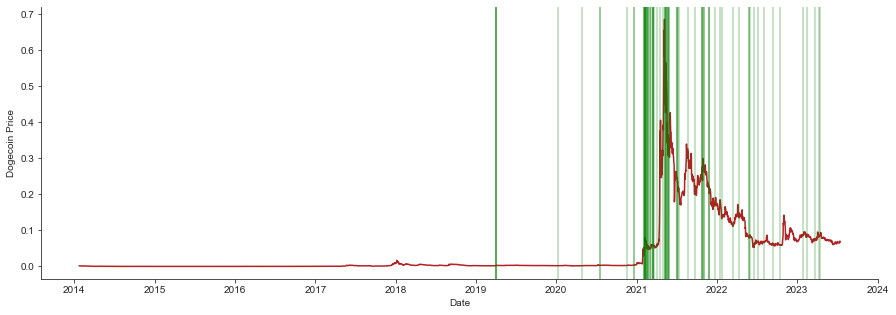

In [367]:
plt.figure(figsize=(15,5))
sns.set_style("ticks")
ax = sns.lineplot(data=doge2,x="date",y='PriceUSD',color='firebrick')
ax.set(xlabel='Date', ylabel='Dogecoin Price')
for tweet_date in dataset_doge['date']:
    ax.axvline(x=tweet_date, color='green', linestyle='-', alpha=0.3)
sns.despine()
plt.savefig("dogecoin_price_tweets.png", dpi = 600, transparent = True, bbox_inches = 'tight')

In [139]:
tweet_date

Timestamp('2023-05-22 20:00:00')

In [366]:
tweets['MESSAGE'] = tweets['MESSAGE'].fillna('')


# Filter tweets containing specific words
filtered_doge = tweets[tweets['MESSAGE'].str.contains('DOGE|dogecoin|Dogecoin|doge coin', case=False, regex=True)]

# Create a new dataset with selected columns
dataset_doge = filtered_doge[['MESSAGE', 'date','sentiment']].copy()


In [320]:
dataset_doge.to_csv('dataset_doge.csv')


,MESSAGE,date,sentiment
6451,Dogecoin might be my fav cryptocurrency. It’s ...,2019-04-02 09:00:00,Positive
6457,Dogecoin value may vary [https://t.co/UWerAhPv...,2019-04-02 20:00:00,Neutral
6723,Replying to \n@techreview\nJust use this handy...,2019-04-14 22:00:00,Negative
10760,Toss some dogecoin to ur Witcher— Buff Mage (@...,2020-01-10 10:00:00,Neutral
12373,Replying to \n@28delayslater\n and \n@justpaul...,2020-04-25 13:00:00,Neutral
...,...,...,...
31785,@cb_doge Definitely — Elon Musk (@elonmusk) [M...,2023-05-18 23:00:00,Neutral
31825,"@cb_doge 🤣 — Elon Musk (@elonmusk) [May 19, 20...",2023-05-19 17:00:00,Neutral
31846,@cb_doge Cool! — Elon Musk (@elonmusk) [May 20...,2023-05-20 20:00:00,Positive
31847,"@cb_doge Yes — Elon Musk (@elonmusk) [May 20, ...",2023-05-20 21:00:00,Neutral


In [110]:
doge2 = doge2[['date', 'PriceUSD']]

In [112]:
from math import ceil, sqrt

def movmean(v, kb, kf):
    """
    Computes the mean with a window of length kb+kf+1 that includes the element
    in the current position, kb elements backward, and kf elements forward.
    Nonexisting elements at the edges get substituted with NaN.
    Args:
        v (list(float)): List of values.
        kb (int): Number of elements to include before current position
        kf (int): Number of elements to include after current position
    Returns:
        list(float): List of the same size as v containing the mean values
    """
    m = len(v) * [np.nan]
    for i in range(kb, len(v)-kf):
        m[i] = np.mean(v[i-kb:i+kf+1])
    return m


def LeeMykland(S, sampling, significance_level=0.01):
    """
    "Jumps in Equilibrium Prices and Market Microstructure Noise"
    - by Suzanne S. Lee and Per A. Mykland

    "https://galton.uchicago.edu/~mykland/paperlinks/LeeMykland-2535.pdf"

    Args:
        S (list(float)): An array containing prices, where each entry
                         corresponds to the price sampled every 'sampling' days.
        sampling (int): Days between entries in S
        significance_level (float): Defaults to 1% (0.001)

    Returns:
        A pandas dataframe containing a row covering the interval
        [t_i, t_i+sampling] containing the following values:
        J:   Binary value is jump with direction (sign)
        L:   L statistics
        T:   Test statistics
        sig: Volatility estimate
    """
    tm = 252  # Trading days per year
    k = ceil(sqrt(tm / sampling))
    r = np.append(np.nan, np.diff(S))
    bpv = np.multiply(np.absolute(r[:]), np.absolute(np.append(np.nan, r[:-1])))
    bpv = np.append(np.nan, bpv[0:-1]).reshape(-1, 1)  # Realized bipower variation
    sig = np.sqrt(movmean(bpv, k - 3, 0))  # Volatility estimate
    L = r / sig
    n = np.size(S)  # Length of S
    c = (2 / np.pi) ** 0.5
    Sn = c * (2 * np.log(n)) ** 0.5
    Cn = (2 * np.log(n)) ** 0.5 / c - np.log(np.pi * np.log(n)) / (2 * c * (2 * np.log(n)) ** 0.5)
    beta_star = -np.log(-np.log(1 - significance_level))  # Jump threshold
    T = (abs(L) - Cn) * Sn
    J = (T > beta_star).astype(float)
    J = J * np.sign(r)  # Add direction
    # First k rows are NaN involved in bipower variation estimation are set to NaN.
    J[0:k] = np.nan
    # Build and return result dataframe
    return pd.DataFrame({'L': L, 'sig': sig, 'T': T, 'J': J})


prices_dogecoin = doge2['PriceUSD'].tolist()

sampling = 1  # Change the sampling interval to 1 (since it's daily data)

result_dogecoin = LeeMykland(prices_dogecoin, sampling)

result_dogecoin

,L,sig,T,J
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
3502,0.058644,0.001259,-14.513834,0.0
3503,-0.331770,0.001212,-13.633335,-0.0
3504,4.799802,0.001144,0.770674,0.0
3505,-1.717648,0.001139,-9.165549,-0.0


In [113]:
jumps_dogecoin = result_dogecoin[(result_dogecoin['J'] == 1) | (result_dogecoin['J'] == -1)]

In [174]:
jumps_dogecoin

,L,sig,T,J
id,,,,
280,6.621846,0.000011,6.644568,1.0
535,6.015771,0.000005,4.690708,1.0
618,-6.617795,0.000004,6.631508,-1.0
762,7.785726,0.000003,10.396674,1.0
779,13.721470,0.000009,29.532281,1.0
780,6.983099,0.000016,7.809171,1.0
842,8.957404,0.000005,14.173920,1.0
1013,6.411872,0.000003,5.967654,1.0
1211,10.034898,0.000019,17.647538,1.0


In [115]:
jumps_dogecoin = jumps_dogecoin.rename_axis('id')

In [116]:
doge2 = doge2.rename_axis("id")

In [117]:
jumps_dogecoin_dates = pd.merge(doge2, jumps_dogecoin, on ='id', how = 'inner')

In [118]:
jumps_dogecoin_dates

,date,PriceUSD,L,sig,T,J
id,,,,,,
280,2014-09-14,0.000338,6.621846,0.000011,6.644568,1.0
535,2015-05-27,0.000182,6.015771,0.000005,4.690708,1.0
618,2015-08-18,0.000124,-6.617795,0.000004,6.631508,-1.0
762,2016-01-09,0.000181,7.785726,0.000003,10.396674,1.0
779,2016-01-26,0.000334,13.721470,0.000009,29.532281,1.0
780,2016-01-27,0.000448,6.983099,0.000016,7.809171,1.0
842,2016-03-29,0.000257,8.957404,0.000005,14.173920,1.0
1013,2016-09-16,0.000251,6.411872,0.000003,5.967654,1.0
1211,2017-04-02,0.000525,10.034898,0.000019,17.647538,1.0


In [146]:


# Create a new column representing the month
jumps_dogecoin_dates['Month'] = jumps_dogecoin_dates['date'].dt.to_period('M')

# Group by month and count the occurrences of the desired value
dogecoin_jumps_1 = pd.DataFrame(jumps_dogecoin_dates.groupby('Month')['J'].count()).reset_index()

In [147]:
dogecoin_jumps_1

,Month,J
0,2014-09,1
1,2015-05,1
2,2015-08,1
3,2016-01,3
4,2016-03,1
5,2016-09,1
6,2017-04,1
7,2017-05,2
8,2017-08,1
9,2017-09,1


In [148]:
dogecoin_jumps_1['Month'] = dogecoin_jumps_1['Month'].dt.to_timestamp()

In [369]:
dataset_doge

,MESSAGE,date,sentiment
2968,Dogecoin might be my fav cryptocurrency. It’s ...,2019-04-02 09:00:00,Positive
2970,"Dogecoin rulz\n1,717\n16.9K\n134.4K",2019-04-02 20:00:00,Neutral
2971,Dogecoin rulz [pic.twitter.com/flWWUgAgLU](htt...,2019-04-02 20:00:00,Neutral
2973,Dogecoin value may vary\ntheonion.com\nBitcoin...,2019-04-02 20:00:00,Negative
5272,Toss some dogecoin to ur Witcher— Buff Mage ()...,2020-01-10 10:00:00,Neutral
...,...,...,...
14525,"Thank you, Sir Doge!— Elon Musk () [Jan 25, 2...",2023-01-25 18:00:00,Neutral
14810,"Dogecoin— Elon Musk () [Feb 13, 2023](https:/...",2023-02-13 04:00:00,Neutral
15420,"Ok, but it will cost 3 Doge— Elon Musk () [Ma...",2023-03-23 09:00:00,Positive
15728,"What does a dyslexic, agnostic amnesiac who b...",2023-04-10 04:00:00,Neutral


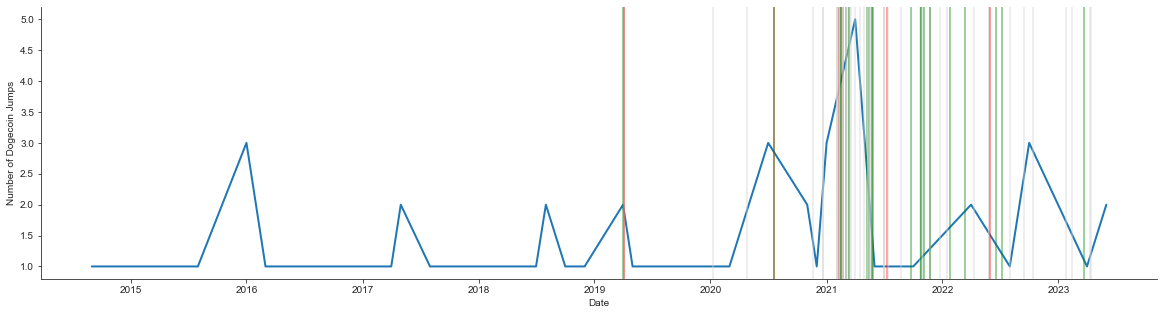

In [368]:
plt.figure(figsize=(20,5))
sns.set_style("ticks")

# Create a lineplot with bars
ax = sns.lineplot(data=dogecoin_jumps_1, x='Month', y='J', estimator=None, lw=2)

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Number of Dogecoin Jumps')

# Loop through the tweets and add vertical lines with different colors based on sentiment
for tweet, sentiment in zip(dataset_doge['date'], dataset_doge['sentiment']):
    if sentiment == 'Positive':
        color = 'green'
    elif sentiment == 'Negative':
        color = 'red'
    else:
        color = 'lightgray'  # Adjust for neutral sentiment if needed
    ax.axvline(x=tweet, color=color, linestyle='-', alpha=0.5)

# Remove the spines
sns.despine()

# Save the plot
plt.savefig("dogecoin_number_of_jumps_new.png", dpi=600, transparent=True, bbox_inches='tight')


In [379]:
dogecoin_jumps_1

,Month,J
0,2014-09-01,1
1,2015-05-01,1
2,2015-08-01,1
3,2016-01-01,3
4,2016-03-01,1
5,2016-09-01,1
6,2017-04-01,1
7,2017-05-01,2
8,2017-08-01,1
9,2017-09-01,1


In [180]:
tweets['MESSAGE'] = tweets['MESSAGE'].fillna('')


# Filter tweets containing specific words
filtered_btc = tweets[tweets['MESSAGE'].str.contains("Bitcoin|Bit coin|bitcoin|BTC", case=False, regex=True)]

# Create a new dataset with selected columns
dataset_btc = filtered_btc[['MESSAGE', 'date','sentiment']].copy()


In [181]:
dataset_btc

,MESSAGE,date,sentiment
2885,Replying to \n@ThisIsSandeepG\nNot true. A fri...,2017-11-28 02:00:00,Negative
2961,Replying to \n@NeerajKA\nNever heard of it\nth...,2017-12-23 03:00:00,Negative
3098,Replying to \n@DeadlyBananas\n and \n@MichaelA...,2018-02-22 09:00:00,Positive
3423,"Replying to \n@BitcoinCadet\nYo\n23\n115\n3,183",2018-05-24 00:00:00,Neutral
4299,Replying to \n@vicentes\n and \n@Grimezsz\nWan...,2018-10-22 23:00:00,Neutral
...,...,...,...
24645,@BitcoinStripper Talulah designed that dress h...,2022-07-02 02:00:00,Positive
26269,"@BTC_Archive Needs some tweaks, but overall pr...",2022-11-11 16:00:00,Neutral
26372,"@dawallach @Jason BTC will make it, but might ...",2022-11-14 07:00:00,Negative
27094,@EthanBitcoin @dergigi lol— Elon Musk (@elonmu...,2022-12-08 09:00:00,Neutral


In [158]:
from math import ceil, sqrt

def movmean(v, kb, kf):
    """
    Computes the mean with a window of length kb+kf+1 that includes the element
    in the current position, kb elements backward, and kf elements forward.
    Nonexisting elements at the edges get substituted with NaN.
    Args:
        v (list(float)): List of values.
        kb (int): Number of elements to include before current position
        kf (int): Number of elements to include after current position
    Returns:
        list(float): List of the same size as v containing the mean values
    """
    m = len(v) * [np.nan]
    for i in range(kb, len(v)-kf):
        m[i] = np.mean(v[i-kb:i+kf+1])
    return m


def LeeMykland(S, sampling, significance_level=0.01):
    """
    "Jumps in Equilibrium Prices and Market Microstructure Noise"
    - by Suzanne S. Lee and Per A. Mykland

    "https://galton.uchicago.edu/~mykland/paperlinks/LeeMykland-2535.pdf"

    Args:
        S (list(float)): An array containing prices, where each entry
                         corresponds to the price sampled every 'sampling' days.
        sampling (int): Days between entries in S
        significance_level (float): Defaults to 1% (0.001)

    Returns:
        A pandas dataframe containing a row covering the interval
        [t_i, t_i+sampling] containing the following values:
        J:   Binary value is jump with direction (sign)
        L:   L statistics
        T:   Test statistics
        sig: Volatility estimate
    """
    tm = 252  # Trading days per year
    k = ceil(sqrt(tm / sampling))
    r = np.append(np.nan, np.diff(S))
    bpv = np.multiply(np.absolute(r[:]), np.absolute(np.append(np.nan, r[:-1])))
    bpv = np.append(np.nan, bpv[0:-1]).reshape(-1, 1)  # Realized bipower variation
    sig = np.sqrt(movmean(bpv, k - 3, 0))  # Volatility estimate
    L = r / sig
    n = np.size(S)  # Length of S
    c = (2 / np.pi) ** 0.5
    Sn = c * (2 * np.log(n)) ** 0.5
    Cn = (2 * np.log(n)) ** 0.5 / c - np.log(np.pi * np.log(n)) / (2 * c * (2 * np.log(n)) ** 0.5)
    beta_star = -np.log(-np.log(1 - significance_level))  # Jump threshold
    T = (abs(L) - Cn) * Sn
    J = (T > beta_star).astype(float)
    J = J * np.sign(r)  # Add direction
    # First k rows are NaN involved in bipower variation estimation are set to NaN.
    J[0:k] = np.nan
    # Build and return result dataframe
    return pd.DataFrame({'L': L, 'sig': sig, 'T': T, 'J': J})


prices_btc = btc['open'].tolist()

sampling = 1  # Change the sampling interval to 1 (since it's daily data)

result_btc = LeeMykland(prices_btc, sampling)

result_btc

,L,sig,T,J
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
33254,-3.712193,23.592524,-5.564121,-0.0
33255,0.820299,24.588597,-16.093583,0.0
33256,0.394334,26.652549,-17.644533,0.0
33257,0.075707,26.285692,-18.804663,0.0


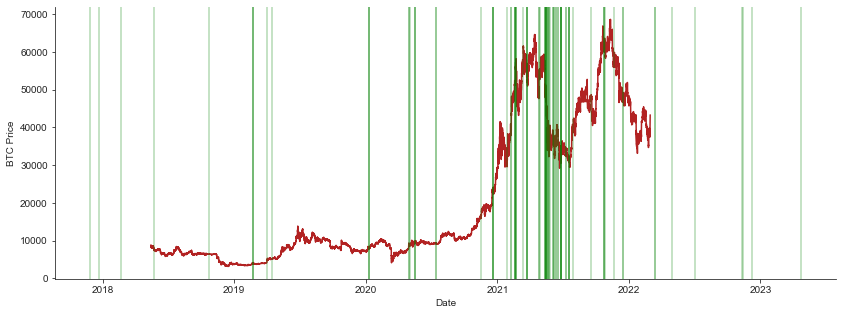

In [182]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
ax = sns.lineplot(data=btc,x="date",y='close',color='firebrick')
ax.set(xlabel='Date', ylabel='BTC Price')
for tweet_date in dataset_btc['date']:
    ax.axvline(x=tweet_date, color='green', linestyle='-', alpha=0.3)
sns.despine()
plt.savefig("btc_price_tweets.png", dpi = 600, transparent = True, bbox_inches = 'tight')

In [161]:
jumps_btc = result_btc[(result_btc['J'] == 1) | (result_btc['J'] == -1)]

In [167]:
jumps_btc

,L,sig,T,J
id,,,,
249,9.032608,76.399863,13.807650,1.0
275,6.686552,146.918766,5.265600,1.0
335,-9.653373,92.126348,16.067872,-1.0
387,8.022180,98.784872,10.128655,1.0
484,-7.241972,172.697437,7.287898,-1.0
...,...,...,...,...
32874,-6.816207,10.715638,5.737674,-1.0
32876,-8.596201,14.220236,12.218680,-1.0
32917,-8.136992,28.023870,10.546689,-1.0


In [392]:
jumps_dogecoin_dates

,date,PriceUSD,L,sig,T,J,Month
id,,,,,,,
280,2014-09-14,0.000338,6.621846,0.000011,6.644568,1.0,2014-09
535,2015-05-27,0.000182,6.015771,0.000005,4.690708,1.0,2015-05
618,2015-08-18,0.000124,-6.617795,0.000004,6.631508,-1.0,2015-08
762,2016-01-09,0.000181,7.785726,0.000003,10.396674,1.0,2016-01
779,2016-01-26,0.000334,13.721470,0.000009,29.532281,1.0,2016-01
780,2016-01-27,0.000448,6.983099,0.000016,7.809171,1.0,2016-01
842,2016-03-29,0.000257,8.957404,0.000005,14.173920,1.0,2016-03
1013,2016-09-16,0.000251,6.411872,0.000003,5.967654,1.0,2016-09
1211,2017-04-02,0.000525,10.034898,0.000019,17.647538,1.0,2017-04


In [170]:
jumps_btc = jumps_btc.rename_axis('id')
btc = btc.rename_axis("id")
jumps_btc_dates = pd.merge(btc, jumps_btc, on ='id', how = 'inner')

In [175]:

jumps_btc_dates['Day'] = jumps_btc_dates['date'].dt.to_period('D')

# Group by month and count the occurrences of the desired value
btc_n_jumps = pd.DataFrame(jumps_btc_dates.groupby('Day')['J'].count()).reset_index()
btc_n_jumps['Day'] = btc_n_jumps['Day'].dt.to_timestamp()

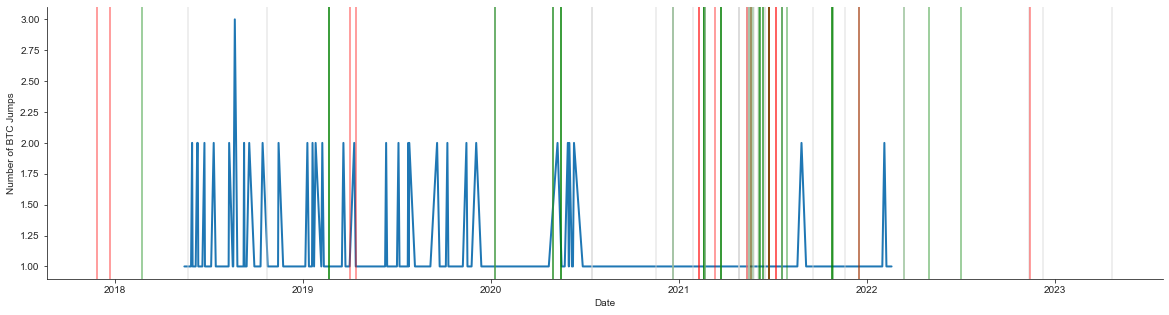

In [370]:
plt.figure(figsize=(20,5))
sns.set_style("ticks")

# Create a lineplot with bars
ax = sns.lineplot(data=btc_n_jumps, x='Day', y='J', estimator=None, lw=2)

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Number of BTC Jumps')

# Loop through the tweets and add vertical lines with different colors based on sentiment
for tweet, sentiment in zip(dataset_btc['date'], dataset_btc['sentiment']):
    if sentiment == 'Positive':
        color = 'green'
    elif sentiment == 'Negative':
        color = 'red'
    else:
        color = 'lightgray'  # Adjust for neutral sentiment if needed
    ax.axvline(x=tweet, color=color, linestyle='-', alpha=0.5)

# Remove the spines
sns.despine()

# Save the plot
plt.savefig("bitcoin_number_of_jumps_new.png", dpi=600, transparent=True, bbox_inches='tight')


In [186]:
dogecoin_october = jumps_dogecoin_dates[["Month" ==2022-10]]

ValueError: Item wrong length 1 instead of 52.

In [371]:
jumps_doge_april = jumps_dogecoin_dates[(jumps_dogecoin_dates['Month'] == '2021-04')]

In [372]:
jumps_doge_april

,date,PriceUSD,L,sig,T,J,Month
id,,,,,,,
2671,2021-04-01,0.061327,7.338024,0.001057,8.953377,1.0,2021-04
2683,2021-04-13,0.093073,6.762546,0.003279,7.098155,1.0,2021-04
2684,2021-04-14,0.122003,7.040036,0.004109,7.992723,1.0,2021-04
2685,2021-04-15,0.177733,7.038216,0.007918,7.986858,1.0,2021-04
2686,2021-04-16,0.375427,14.835390,0.013326,33.123329,1.0,2021-04


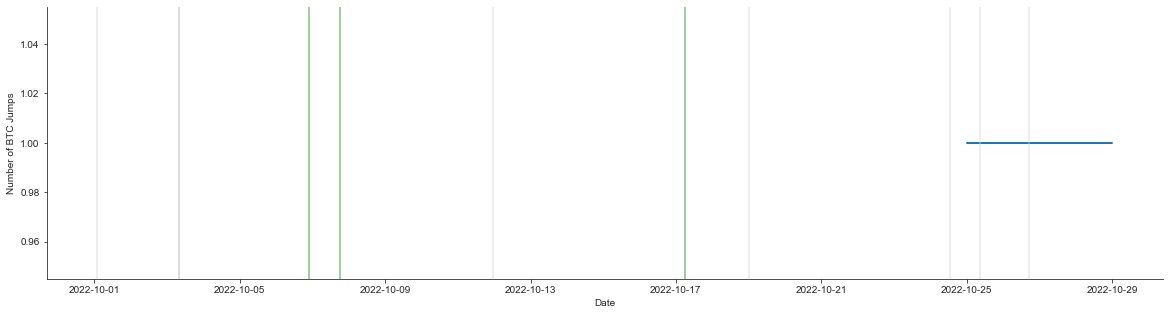

In [373]:
plt.figure(figsize=(20,5))
sns.set_style("ticks")

# Create a lineplot with bars
ax = sns.lineplot(data=jumps_doge_october, x='date', y='J', estimator=None, lw=2)

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Number of BTC Jumps')

# Loop through the tweets and add vertical lines with different colors based on sentiment
for tweet, sentiment in zip(doge_tweets_october['date'], doge_tweets_october['sentiment']):
    if sentiment == 'Positive':
        color = 'green'
    elif sentiment == 'Negative':
        color = 'red'
    else:
        color = 'lightgray'  # Adjust for neutral sentiment if needed
    ax.axvline(x=tweet, color=color, linestyle='-', alpha=0.5)

# Remove the spines
sns.despine()

# Save the plot
plt.savefig("doge_jumps_october.png", dpi=600, transparent=True, bbox_inches='tight')


In [374]:

doge_tweets_april = dataset_doge[(dataset_doge['date'] >= '2021-04-01 00:00:00') & (dataset_doge['date'] <= '2021-05-01 00:00:00')]

In [227]:
doge_tweets_april.to_csv('doge_tweets_april.csv')

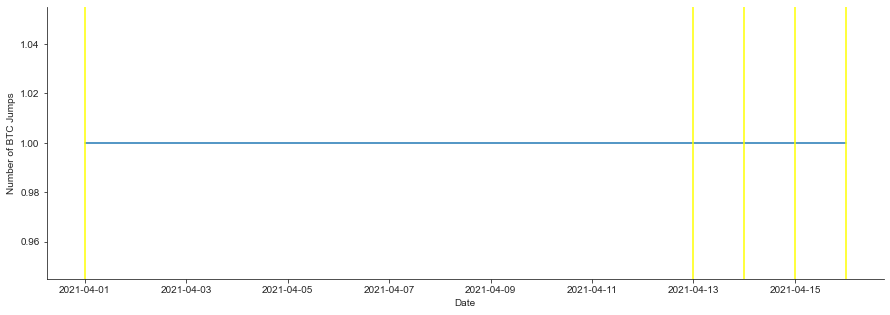

In [375]:
plt.figure(figsize=(15, 5))
sns.set_style("ticks")

# Create a lineplot with bars
ax = sns.lineplot(data=jumps_doge_april, x='date', y='J', estimator=None)

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Number of BTC Jumps')

# Loop through the jumps and add red vertical lines
for jump_date in jumps_doge_april['date']:
    ax.axvline(x=jump_date, color='yellow', alpha=1)


# Remove the spines
sns.despine()

# Save the plot
plt.savefig("doge_jumps_october.png", dpi=600, transparent=True, bbox_inches='tight')


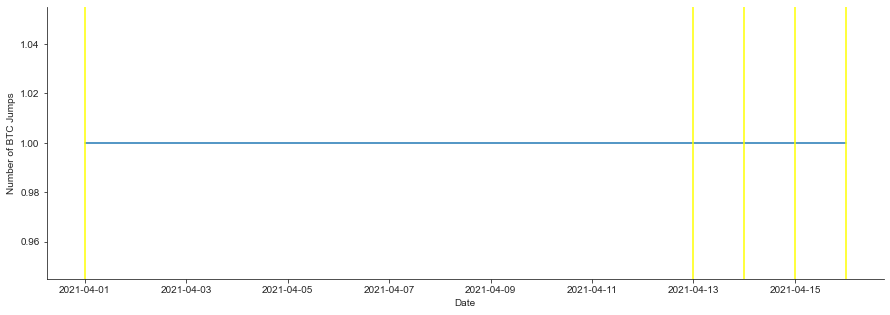

In [258]:
plt.figure(figsize=(15, 5))
sns.set_style("ticks")

# Create a lineplot without aggregation
ax = sns.lineplot(data=jumps_doge_april, x='date', y='J', estimator = True)

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Number of BTC Jumps')

# Loop through the jumps and add yellow vertical lines
for jump_date in jumps_doge_april['date']:
    ax.axvline(x=jump_date, color='yellow', alpha=1)

# Remove the spines
sns.despine()

# Save the plot
plt.savefig("doge_jumps_october.png", dpi=600, transparent=True, bbox_inches='tight')


In [234]:
doge_tweets_april
doge_tweets_april['date'] = pd.to_datetime(doge_tweets_april['date'])
# Create a new column representing the month
doge_tweets_april['Day'] = doge_tweets_april['date'].dt.to_period('D')
doge_tweets_april['Day'] = doge_tweets_april['Day'].dt.to_timestamp()

<ipython-input-234-b6d98b51381f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_tweets_april['date'] = pd.to_datetime(doge_tweets_april['date'])
<ipython-input-234-b6d98b51381f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_tweets_april['Day'] = doge_tweets_april['date'].dt.to_period('D')
<ipython-input-234-b6d98b51381f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [378]:
doge_tweets_april

,MESSAGE,date,sentiment
8636,SpaceX is going to put a literal Dogecoin on t...,2021-04-01 10:00:00,Neutral
8746,Doge Barking at the Moon – Miro [pic.twitter.c...,2021-04-15 04:00:00,Neutral
8817,The Dogefather\nSNL May 8\n36.4K\n85K\n446.7K,2021-04-28 06:00:00,Neutral


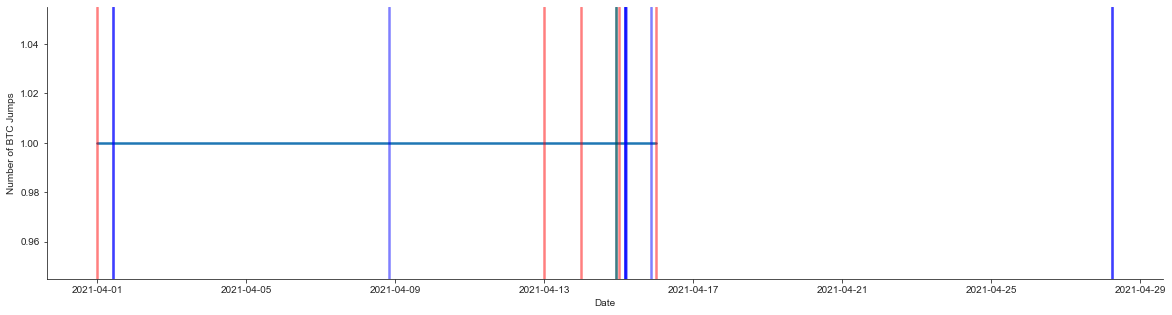

In [327]:
plt.figure(figsize=(20, 5))
sns.set_style("ticks")

# Create a lineplot with bars
ax = sns.lineplot(data=jumps_doge_april, x='date', y='J', estimator=None, lw=2.5)  # Increase the line width to 2.5

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Number of BTC Jumps')

# Loop through the jumps and add red vertical lines
for jump_date in jumps_doge_april['date']:
    ax.axvline(x=jump_date, color='red', alpha=0.5, lw=2.5)  # Increase the line width to 2.5

# Loop through the tweets and add green or red vertical lines based on sentiment
for tweet, sentiment in zip(doge_tweets_april['date'], doge_tweets_april['sentiment']):
    if sentiment == 'Positive':
        color = 'green'
    elif sentiment == 'Negative':
        color = 'red'
    else:
        color = 'blue'  # Adjust for neutral sentiment if needed
    ax.axvline(x=tweet, color=color, linestyle='-', alpha=0.5, lw=2.5)  # Increase the line width to 2.5

# Remove the spines
sns.despine()

# Save the plot
plt.savefig("doge_jumps_april.png", dpi=600, transparent=True, bbox_inches='tight')


In [248]:
doge2 = pd.DataFrame(doge2)

In [333]:
# Assuming you have a DataFrame 'df' with a column 'text'

# Define a function to check if two strings have the same first 3 words
def same_first_3_words(str1, str2):
    return str1.split()[:3] == str2.split()[:3]

# Iterate through the 'text' column and delete rows with the same first 3 words
doge_tweets_april = doge_tweets_april[~doge_tweets_april['MESSAGE'].apply(lambda x: any(same_first_3_words(x, y) for y in doge_tweets_april['MESSAGE']))]

# Print the updated DataFrame



In [339]:
# Assuming you have a DataFrame 'doge_tweets_april' with a column 'MESSAGE'

# Iterate through each row in the 'MESSAGE' column
for i in range(len(doge_tweets_april['MESSAGE'])):
    current_text = doge_tweets_april.loc[i, 'MESSAGE']  # Get the text value of the current row
    same_first_3_words = False  # Flag to track if there are rows with the same first 3 words
    
    # Iterate through the remaining rows in the 'MESSAGE' column
    for j in range(i + 1, len(doge_tweets_april['MESSAGE'])):
        compare_text = doge_tweets_april.loc[j, 'MESSAGE']  # Get the text value of the row to compare
        
        # Check if the first 3 words are the same
        if current_text.split()[:3] == compare_text.split()[:3]:
            same_first_3_words = True
            break  # Exit the inner loop if a match is found
    
    # Delete the row if there are rows with the same first 3 words
    if same_first_3_words:
        doge_tweets_april = doge_tweets_april.drop(i)

# Reset the index of the DataFrame
doge_tweets_april = doge_tweets_april.reset_index(drop=True)

# Print the updated DataFrame
print(doge_tweets_april)


KeyError: 0

In [338]:
doge_tweets_april = doge_tweets_april.rename_axis('id')

In [343]:
copy_copy = tweets

In [347]:
all_tweets_bitcoin

,MESSAGE,date,Day,sentiment_score,sentiment,unix,symbol,open,high,low,close,Volume BTC,Volume USD
0,Boring Company Hyperloop will take you from ci...,2018-05-16 09:00:00,2018-05-16,0.240000,Positive,1526461200,BTC/USD,8207.48,8263.93,8207.48,8243.45,1.501104e+06,1.823600e+02
1,Will be presenting & taking questions about T...,2018-05-16 10:00:00,2018-05-16,-1.000000,Negative,1526464800,BTC/USD,8243.45,8455.66,8237.10,8371.13,7.667494e+06,9.153200e+02
2,"Listening to REALiTi\n944\n4,719\n27.8K",2018-05-17 06:00:00,2018-05-17,0.000000,Neutral,1526536800,BTC/USD,8363.70,8382.41,8335.49,8344.16,1.761990e+06,2.107700e+02
3,lol https://instagram.com/p/Bi43eF1DsLt/?utm_s...,2018-05-17 18:00:00,2018-05-17,0.800000,Positive,1526580000,BTC/USD,8257.69,8274.83,8110.02,8166.00,4.838784e+06,5.910600e+02
4,Excited for \n\n partnership with LA Metro\nLA...,2018-05-18 00:00:00,2018-05-18,0.375000,Positive,1526601600,BTC/USD,8067.03,8068.92,7929.53,7958.08,4.185614e+06,5.244200e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12621,https://t.co/4kRJyp0FOv— Elon Musk () [Feb 26...,2022-02-26 01:00:00,2022-02-26,0.000000,Neutral,1645837200,BTC/USD,39774.69,39844.04,39601.00,39759.90,3.466074e+01,1.378107e+06
12622,"Yes— Elon Musk () [Feb 26, 2022](https://twi...",2022-02-26 01:00:00,2022-02-26,0.000000,Neutral,1645837200,BTC/USD,39774.69,39844.04,39601.00,39759.90,3.466074e+01,1.378107e+06
12623,"Good thread— Elon Musk () [Feb 26, 2022](http...",2022-02-26 01:00:00,2022-02-26,0.700000,Positive,1645837200,BTC/USD,39774.69,39844.04,39601.00,39759.90,3.466074e+01,1.378107e+06
12624,Starlink service is now active in Ukraine. Mo...,2022-02-26 23:00:00,2022-02-26,0.183333,Positive,1645916400,BTC/USD,39159.91,39183.18,38938.99,39146.66,3.899397e+01,1.526484e+06


In [348]:
# Assuming you have a DataFrame 'copy' with a column 'MESSAGE'

# Create a copy of the DataFrame
copy_copy = copy.copy()

# Iterate through each row in the 'MESSAGE' column
for i in range(len(all_tweets_bitcoin['MESSAGE']) - 1, -1, -1):
    current_text = all_tweets_bitcoin.iloc[i]['MESSAGE']  # Get the text value of the current row
    same_first_3_words = False  # Flag to track if there are rows with the same first 3 words
    
    # Iterate through the remaining rows in the 'MESSAGE' column
    for j in range(i - 1, -1, -1):
        compare_text = all_tweets_bitcoin.iloc[j]['MESSAGE']  # Get the text value of the row to compare
        
        # Check if the first 3 words are the same
        if current_text.split()[:3] == compare_text.split()[:3]:
            same_first_3_words = True
            break  # Exit the inner loop if a match is found
    
    # Delete the row if there are rows with the same first 3 words
    if same_first_3_words:
        all_tweets_bitcoin = all_tweets_bitcoin.drop(i)

# Reset the index of the DataFrame
all_tweets_bitcoin = all_tweets_bitcoin.reset_index(drop=True)

# Print the updated DataFrame
print(all_tweets_bitcoin)


KeyboardInterrupt: 

In [349]:
# Create a set to store the first 3 words of each row
first_3_words_set = set()

# Iterate through each row in the 'MESSAGE' column
for index, row in all_tweets_bitcoin.iterrows():
    # Extract the first 3 words of the current row
    first_3_words = ' '.join(row['MESSAGE'].split()[:3])

    # Check if the first 3 words already exist in the set
    if first_3_words in first_3_words_set:
        all_tweets_bitcoin = all_tweets_bitcoin.drop(index)
    else:
        first_3_words_set.add(first_3_words)

# Reset the index of the DataFrame
all_tweets_bitcoin = all_tweets_bitcoin.reset_index(drop=True)

# Print the updated DataFrame
print(all_tweets_bitcoin)


                                                MESSAGE                date  \
0     Boring Company Hyperloop will take you from ci... 2018-05-16 09:00:00   
1     Will be presenting & taking questions  about T... 2018-05-16 10:00:00   
2               Listening to REALiTi\n944\n4,719\n27.8K 2018-05-17 06:00:00   
3     lol https://instagram.com/p/Bi43eF1DsLt/?utm_s... 2018-05-17 18:00:00   
4     Excited for \n\n partnership with LA Metro\nLA... 2018-05-18 00:00:00   
...                                                 ...                 ...   
9441   Successful Starlink deploy https://t.co/ChUh6... 2022-02-25 18:00:00   
9442   Would be a good move. Needs to include put op... 2022-02-25 23:00:00   
9443   https://t.co/4kRJyp0FOv— Elon Musk () [Feb 26... 2022-02-26 01:00:00   
9444   Starlink service is now active in Ukraine. Mo... 2022-02-26 23:00:00   
9445   You are most welcome— Elon Musk () [Feb 28, 2... 2022-02-28 21:00:00   

            Day  sentiment_score sentiment        u

In [354]:

# Create a set to store the first 3 words of each row
first_3_words_set = set()

# Iterate through each row in the 'MESSAGE' column
for index, row in dataset_doge.iterrows():
    # Extract the first 3 words of the current row
    first_3_words = ' '.join(row['MESSAGE'].split()[:2])

    # Check if the first 3 words already exist in the set
    if first_3_words in first_3_words_set:
        dataset_doge = dataset_doge.drop(index)
    else:
        first_3_words_set.add(first_3_words)

# Reset the index of the DataFrame
dataset_doge = dataset_doge.reset_index(drop=True)

# Print the updated DataFrame
print(dataset_doge)


                                              MESSAGE                date  \
0   Dogecoin might be my fav cryptocurrency. It’s ... 2019-04-02 09:00:00   
1                 Dogecoin rulz\n1,717\n16.9K\n134.4K 2019-04-02 20:00:00   
2   Dogecoin value may vary\ntheonion.com\nBitcoin... 2019-04-02 20:00:00   
3   Toss some dogecoin to ur Witcher— Buff Mage ()... 2020-01-10 10:00:00   
4   Dogecoin Mode— Elon Musk () [April 25, 2020](h... 2020-04-25 14:00:00   
..                                                ...                 ...   
76   Thank you, Sir Doge!— Elon Musk () [Jan 25, 2... 2023-01-25 18:00:00   
77   Dogecoin— Elon Musk () [Feb 13, 2023](https:/... 2023-02-13 04:00:00   
78   Ok, but it will cost 3 Doge— Elon Musk () [Ma... 2023-03-23 09:00:00   
79   What does a dyslexic, agnostic amnesiac who b... 2023-04-10 04:00:00   
80   Thanks for the 3 Doge! — Elon Musk () [May 4,... 2023-05-04 18:00:00   

   sentiment  
0   Positive  
1    Neutral  
2   Negative  
3    Neutral  


In [355]:
dataset_doge.to_csv('dataset_doge.csv')

In [380]:
doge_prices_october = doge2[(doge2['date'] >= '2022-10-01 00:00:00') & (doge2['date'] <= '2022-11-01 00:00:00')]

In [381]:
doge_prices_october

,date,PriceUSD
id,,
3219,2022-10-01,0.060624
3220,2022-10-02,0.059194
3221,2022-10-03,0.060399
3222,2022-10-04,0.066046
3223,2022-10-05,0.064614
3224,2022-10-06,0.063449
3225,2022-10-07,0.062356
3226,2022-10-08,0.061627
3227,2022-10-09,0.062081


In [382]:
doge_prices_october['growth'] = doge_prices_october['PriceUSD'].pct_change() * 100

# Remove the first row since it will have a NaN value for growth
doge_prices_october = doge_prices_october.dropna()

# Print the DataFrame with the growth column
print(doge_prices_october)

           date  PriceUSD     growth
id                                  
3220 2022-10-02  0.059194  -2.357676
3221 2022-10-03  0.060399   2.035436
3222 2022-10-04  0.066046   9.348921
3223 2022-10-05  0.064614  -2.167623
3224 2022-10-06  0.063449  -1.803745
3225 2022-10-07  0.062356  -1.721591
3226 2022-10-08  0.061627  -1.169389
3227 2022-10-09  0.062081   0.737213
3228 2022-10-10  0.059599  -3.998127
3229 2022-10-11  0.060193   0.995518
3230 2022-10-12  0.059852  -0.565663
3231 2022-10-13  0.059629  -0.373538
3232 2022-10-14  0.058599  -1.725995
3233 2022-10-15  0.058634   0.059074
3234 2022-10-16  0.058957   0.550907
3235 2022-10-17  0.059961   1.702231
3236 2022-10-18  0.059834  -0.211962
3237 2022-10-19  0.058686  -1.917223
3238 2022-10-20  0.059445   1.293256
3239 2022-10-21  0.059366  -0.132732
3240 2022-10-22  0.059669   0.509255
3241 2022-10-23  0.060279   1.022139
3242 2022-10-24  0.059398  -1.460514
3243 2022-10-25  0.062733   5.613894
3244 2022-10-26  0.072424  15.448248
3

<ipython-input-382-a0f208865749>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_prices_october['growth'] = doge_prices_october['PriceUSD'].pct_change() * 100


In [387]:
doge_tweets_october = dataset_doge[(dataset_doge['date'] >= '2023-06-01 00:00:00') & (dataset_doge['date'] <= '2023-07-01 00:00:00')]

In [390]:
dataset_dogeimport pandas as pd
import numpy as np

# Step 1: Prepare the data
# Assuming you have the jumps data in a DataFrame called 'jumps_data' with columns 'Date' and 'Jump'
# Assuming you have Elon Musk's tweets data in a DataFrame called 'elon_tweets' with columns 'Date' and 'Text'

# Step 2: Perform text analysis
# Apply sentiment analysis to Elon Musk's tweets (you can use libraries like TextBlob or VaderSentiment)
elon_tweets['Sentiment'] = elon_tweets['Text'].apply(lambda x: analyze_sentiment(x))

# Step 3: Identify tweet-jump pairs
time_window = pd.Timedelta(days=1)  # Define the time window before a jump to consider
elon_tweets['Jump'] = 0

for jump_date, jump_value in zip(jumps_data['Date'], jumps_data['Jump']):
    mask = (elon_tweets['Date'] >= jump_date - time_window) & (elon_tweets['Date'] < jump_date)
    elon_tweets.loc[mask, 'Jump'] = jump_value

# Step 4: Evaluate the relationship
jump_tweets = elon_tweets[elon_tweets['Jump'] != 0]
jump_sentiment = jump_tweets['Sentiment']
overall_sentiment = elon_tweets['Sentiment']

positive_ratio = jump_sentiment[jump_sentiment == 'Positive'].count() / jump_sentiment.count()
negative_ratio = jump_sentiment[jump_sentiment == 'Negative'].count() / jump_sentiment.count()

# Step 5: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(jumps_data['Date'], jumps_data['Jump'], color='blue')
plt.vlines(jump_tweets['Date'], ymin=-1, ymax=1, colors=jump_sentiment.map({'Positive': 'green', 'Negative': 'red'}), alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Jumps')
plt.title('Jumps in Dogecoin with Elon Musk Tweets')
plt.show()


,MESSAGE,date,sentiment
2968,Dogecoin might be my fav cryptocurrency. It’s ...,2019-04-02 09:00:00,Positive
2970,"Dogecoin rulz\n1,717\n16.9K\n134.4K",2019-04-02 20:00:00,Neutral
2971,Dogecoin rulz [pic.twitter.com/flWWUgAgLU](htt...,2019-04-02 20:00:00,Neutral
2973,Dogecoin value may vary\ntheonion.com\nBitcoin...,2019-04-02 20:00:00,Negative
5272,Toss some dogecoin to ur Witcher— Buff Mage ()...,2020-01-10 10:00:00,Neutral
...,...,...,...
14525,"Thank you, Sir Doge!— Elon Musk () [Jan 25, 2...",2023-01-25 18:00:00,Neutral
14810,"Dogecoin— Elon Musk () [Feb 13, 2023](https:/...",2023-02-13 04:00:00,Neutral
15420,"Ok, but it will cost 3 Doge— Elon Musk () [Ma...",2023-03-23 09:00:00,Positive
15728,"What does a dyslexic, agnostic amnesiac who b...",2023-04-10 04:00:00,Neutral


In [391]:
m = dataset_doge

In [393]:
jumps_dogecoin_dates

,date,PriceUSD,L,sig,T,J,Month
id,,,,,,,
280,2014-09-14,0.000338,6.621846,0.000011,6.644568,1.0,2014-09
535,2015-05-27,0.000182,6.015771,0.000005,4.690708,1.0,2015-05
618,2015-08-18,0.000124,-6.617795,0.000004,6.631508,-1.0,2015-08
762,2016-01-09,0.000181,7.785726,0.000003,10.396674,1.0,2016-01
779,2016-01-26,0.000334,13.721470,0.000009,29.532281,1.0,2016-01
780,2016-01-27,0.000448,6.983099,0.000016,7.809171,1.0,2016-01
842,2016-03-29,0.000257,8.957404,0.000005,14.173920,1.0,2016-03
1013,2016-09-16,0.000251,6.411872,0.000003,5.967654,1.0,2016-09
1211,2017-04-02,0.000525,10.034898,0.000019,17.647538,1.0,2017-04


In [ ]:


# Step 3: Identify tweet-jump pairs
time_window = pd.Timedelta(days=1)  # Define the time window before a jump to consider
m['Jump'] = 0

for jump_date, jump_value in zip(jumps_dogecoin_dates['Date'], jumps_data['Jump']):
    mask = (elon_tweets['Date'] >= jump_date - time_window) & (elon_tweets['Date'] < jump_date)
    elon_tweets.loc[mask, 'Jump'] = jump_value

# Step 4: Evaluate the relationship
jump_tweets = elon_tweets[elon_tweets['Jump'] != 0]
jump_sentiment = jump_tweets['Sentiment']
overall_sentiment = elon_tweets['Sentiment']

positive_ratio = jump_sentiment[jump_sentiment == 'Positive'].count() / jump_sentiment.count()
negative_ratio = jump_sentiment[jump_sentiment == 'Negative'].count() / jump_sentiment.count()

# Step 5: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(jumps_data['Date'], jumps_data['Jump'], color='blue')
plt.vlines(jump_tweets['Date'], ymin=-1, ymax=1, colors=jump_sentiment.map({'Positive': 'green', 'Negative': 'red'}), alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Jumps')
plt.title('Jumps in Dogecoin with Elon Musk Tweets')
plt.show()
